In [39]:
import json
import os
import pandas as pd

# data = pd.read_json('./qwen1_5/EleutherAI_gpt-neo-2.7B/EleutherAI__gpt-neo-2.7B/samples_cnndm_qwen_no_limit_len_2024-07-23T16-51-02.201304.jsonl', lines=True)

# data_as_dict = data.to_dict(orient='records')
# print(data_as_dict[0]['filtered_resps'][0])

In [43]:

# 获取目标文件夹下的所有子文件夹
def get_all_subfolders(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    return subfolders

# 遍历子文件夹中的文件，排除带有'result'的文件，并加载内容
def process_files_in_subfolders(folder_path):
    subfolders = get_all_subfolders(folder_path)
    
    for subfolder in subfolders:
        # print(subfolder)
        if(subfolder != './qwen1_5/brio'):
            continue
        for root, _, files in os.walk(subfolder):
            print(root)
            for file in files:
                if 'result' not in file and file.endswith('.jsonl'):
                    file_path = os.path.join(root, file)
                    print(file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        try:
                            # data = pd.read_json(file_path,lines=True).to_dict(orient='records')
                            data = json.load(f)
                            # 在这里处理每个文件的内容
                            all_length = 0
                            max1= 0 
                            for i in data:
                               
                                res = i['filtered_resps']
                                len_res = len(res.split(' '))
                                # if(len_res <45):
                                #     print(i['doc_id'])
                                if(len_res > max1):
                                    max1 = len_res
                                all_length += len_res
                            print(f'average length is {all_length/len(data)}')
                            print(f'max len is {max1}')
                                
                        except json.JSONDecodeError:
                            print(f"Error decoding JSON from file: {file_path}")
            
        

# 设置目标文件夹路径
folder_path = './qwen1_5/'
process_files_in_subfolders(folder_path)

#qwen1_5 length
# 64.298 69.476 62.86 66.618
#brio average 56.19
#pegasus average 97.3

#average gpt-neo-2.7B 121.546

./qwen1_5/brio
bbc2024_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_brio.jsonl
average length is 56.318
max len is 100
newsroom_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_brio.jsonl
average length is 51.004
max len is 82
cnndm_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_brio.jsonl
average length is 64.718
max len is 113
xsum_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_brio.jsonl
average length is 52.738
max len is 76


In [216]:
#length
import jieba
#两两之间的bertscore相似度

qwen1_5_files = ['xsum_qwen_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                 'newsroom_qwen_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                 'cnndm_qwen_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                 'bbc2024_qwen_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl']

llama2_files = ['xsum_llama2_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                'newsroom_llama2_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                'cnndm_llama2_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl',
                'bbc2024_llama2_no_limit_len_pretrained__ahxt__LiteLlama-460M-1T__trust_remote_code__True.jsonl']

llama3_files = ['xsum_sample_500_0k5_1k5_llama3_70b_summary_no_len_limit.jsonl',
                'newsroom_sample_500_0k5_1k5_llama3_70b_summary_no_len_limit.jsonl',
                'cnndm_sample_500_0k5_1k5_llama3_70b_summary_no_len_limit.jsonl',
                'bbc2024_sample_500_0k5_1k5_llama3_70b_summary_no_len_limit.jsonl']

qwen2_file = ['xsum_sample_500_0k5_1k5_qwen2_summary_no_len_limit.jsonl',
                'newsroom_sample_500_0k5_1k5_qwen2_summary_no_len_limit.jsonl',
                'cnndm_sample_500_0k5_1k5_qwen2_summary_no_len_limit.jsonl',
                'bbc2024_sample_500_0k5_1k5_qwen2_summary_no_len_limit.jsonl']


phi3_files = ['xsum_qwen_no_limit_len_pretrained__microsoft__Phi-3-mini-4k-instruct__trust_remote_code__True.jsonl',
              'newsroom_qwen_no_limit_len_pretrained__microsoft__Phi-3-mini-4k-instruct__trust_remote_code__True.jsonl',
              'cnndm_qwen_no_limit_len_pretrained__microsoft__Phi-3-mini-4k-instruct__trust_remote_code__True.jsonl',
              'bbc2024_qwen_no_limit_len_pretrained__microsoft__Phi-3-mini-4k-instruct__trust_remote_code__True.jsonl']

qwen2_7b_files = ['xsum_qwen_no_limit_len_pretrained__Qwen__Qwen2-7B__trust_remote_code__True.jsonl',
            'newsroom_qwen_no_limit_len_pretrained__Qwen__Qwen2-7B__trust_remote_code__True.jsonl',
            'cnndm_qwen_no_limit_len_pretrained__Qwen__Qwen2-7B__trust_remote_code__True.jsonl',
            'bbc2024_qwen_no_limit_len_pretrained__Qwen__Qwen2-7B__trust_remote_code__True.jsonl']

mistral_ins_files = ['xsum_qwen_no_limit_len_pretrained__mistralai__Mistral-7B-Instruct-v0.2__trust_remote_code__True.jsonl',
                    'newsroom_qwen_no_limit_len_pretrained__mistralai__Mistral-7B-Instruct-v0.2__trust_remote_code__True.jsonl',
                    'cnndm_qwen_no_limit_len_pretrained__mistralai__Mistral-7B-Instruct-v0.2__trust_remote_code__True.jsonl',
                    'bbc2024_qwen_no_limit_len_pretrained__mistralai__Mistral-7B-Instruct-v0.2__trust_remote_code__True.jsonl']

chatglm3_files = ['xsum_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_chatglm3.jsonl',
           'newsroom_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_chatglm3.jsonl',
           'cnndm_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_chatglm3.jsonl',
           'bbc2024_sample_500_0k5_1k5_qwen1.5_72b_summary_no_len_limit.jsonl_chatglm3.jsonl']


base_chatglm3_path = './qwen1_5/chatglm3'

base_mistral_ins_path = './qwen1_5/mistralai_Mistral-7B-Instruct-v0.2'

base_qwen2_7b__path = './qwen1_5/Qwen_Qwen2-7B'

base_phi3 = './qwen1_5/microsoft_Phi-3-mini-4k-instruct'

base_qwen_path = './qwen1_5/ahxt_LiteLlama-460M-1T'

base_llama2_path = './llama2/ahxt_LiteLlama-460M-1T'

base_llama3_path = '/home/xbr/LLM/summary_benchmark/dataset/sample_500_llama3_70b_summary'

base_qwen2_path = '/home/xbr/LLM/summary_benchmark/dataset/sample_500_qwen2_72b_summary'


total_score = 0
max_len = 0
min_len = 999
avg_len = 0
for i in range(len(qwen1_5_files)):
    name = qwen1_5_files[i].split('_')[0]
    print(name)
    
    f1 = base_qwen_path + '/' + qwen1_5_files[i]
    f2 = base_llama2_path + '/' + llama2_files[i]
    f3 = base_llama3_path + '/' + llama3_files[i]
    #use json to load f1 and f2
    qwen = json.load(open(f1))
    llama2 = json.load(open(f2))
    
    llama3 = json.load(open(f3))
    qwen2  = json.load(open(base_qwen2_path + '/' + qwen2_file[i]))
    phi3 = json.load(open(base_phi3 + '/' + phi3_files[i]))
    qwen2_7b = json.load(open(base_qwen2_7b__path + '/' + qwen2_7b_files[i]))
    mistral_ins = json.load(open(base_mistral_ins_path + '/' + mistral_ins_files[i]))
    chatglm3 = json.load(open(base_chatglm3_path + '/' + chatglm3_files[i]))
    
    score = 0
    
    for j in range(len(qwen)):
        # tmp_len = len(qwen[j]['target'].split(' '))
        tmp_len = len(phi3[j]["filtered_resps"][0].split(' '))
        # tmp_len = len(qwen2[j]["qwen_reference_summary"].split(' '))
        # if(tmp_len <=20):
        #     tmp_len = len(list(jieba.cut(qwen[j]['target'], cut_all=False)))
        #     print(tmp_len)
        # score+= BertScore(chatglm3[j]["filtered_resps"], phi3[j]["filtered_resps"][0])['f1'][0]
        # score+= BertScore(qwen[j]['target'], chatglm3[j]["filtered_resps"])['f1'][0]
        # score+= BertScore(qwen2[j]["qwen_reference_summary"],chatglm3[j]['filtered_resps'])['f1'][0]
        #  score+= BertScore(qwen2[j]["qwen_reference_summary"], llama3[j]["qwen_reference_summary"])['f1'][0]
        # score+= BertScore(qwen2[j]["qwen_reference_summary"], qwen[j]['target'])['f1'][0]
        if(tmp_len > max_len):
            max_len = tmp_len
        if(tmp_len < min_len):
            min_len = tmp_len
        avg_len += tmp_len

print(f'min len {min_len} max len {max_len} avg len {avg_len/(len(qwen)*4)}')
    
    
    

xsum
newsroom
cnndm
bbc2024
min len 1 max len 174 avg len 43.484


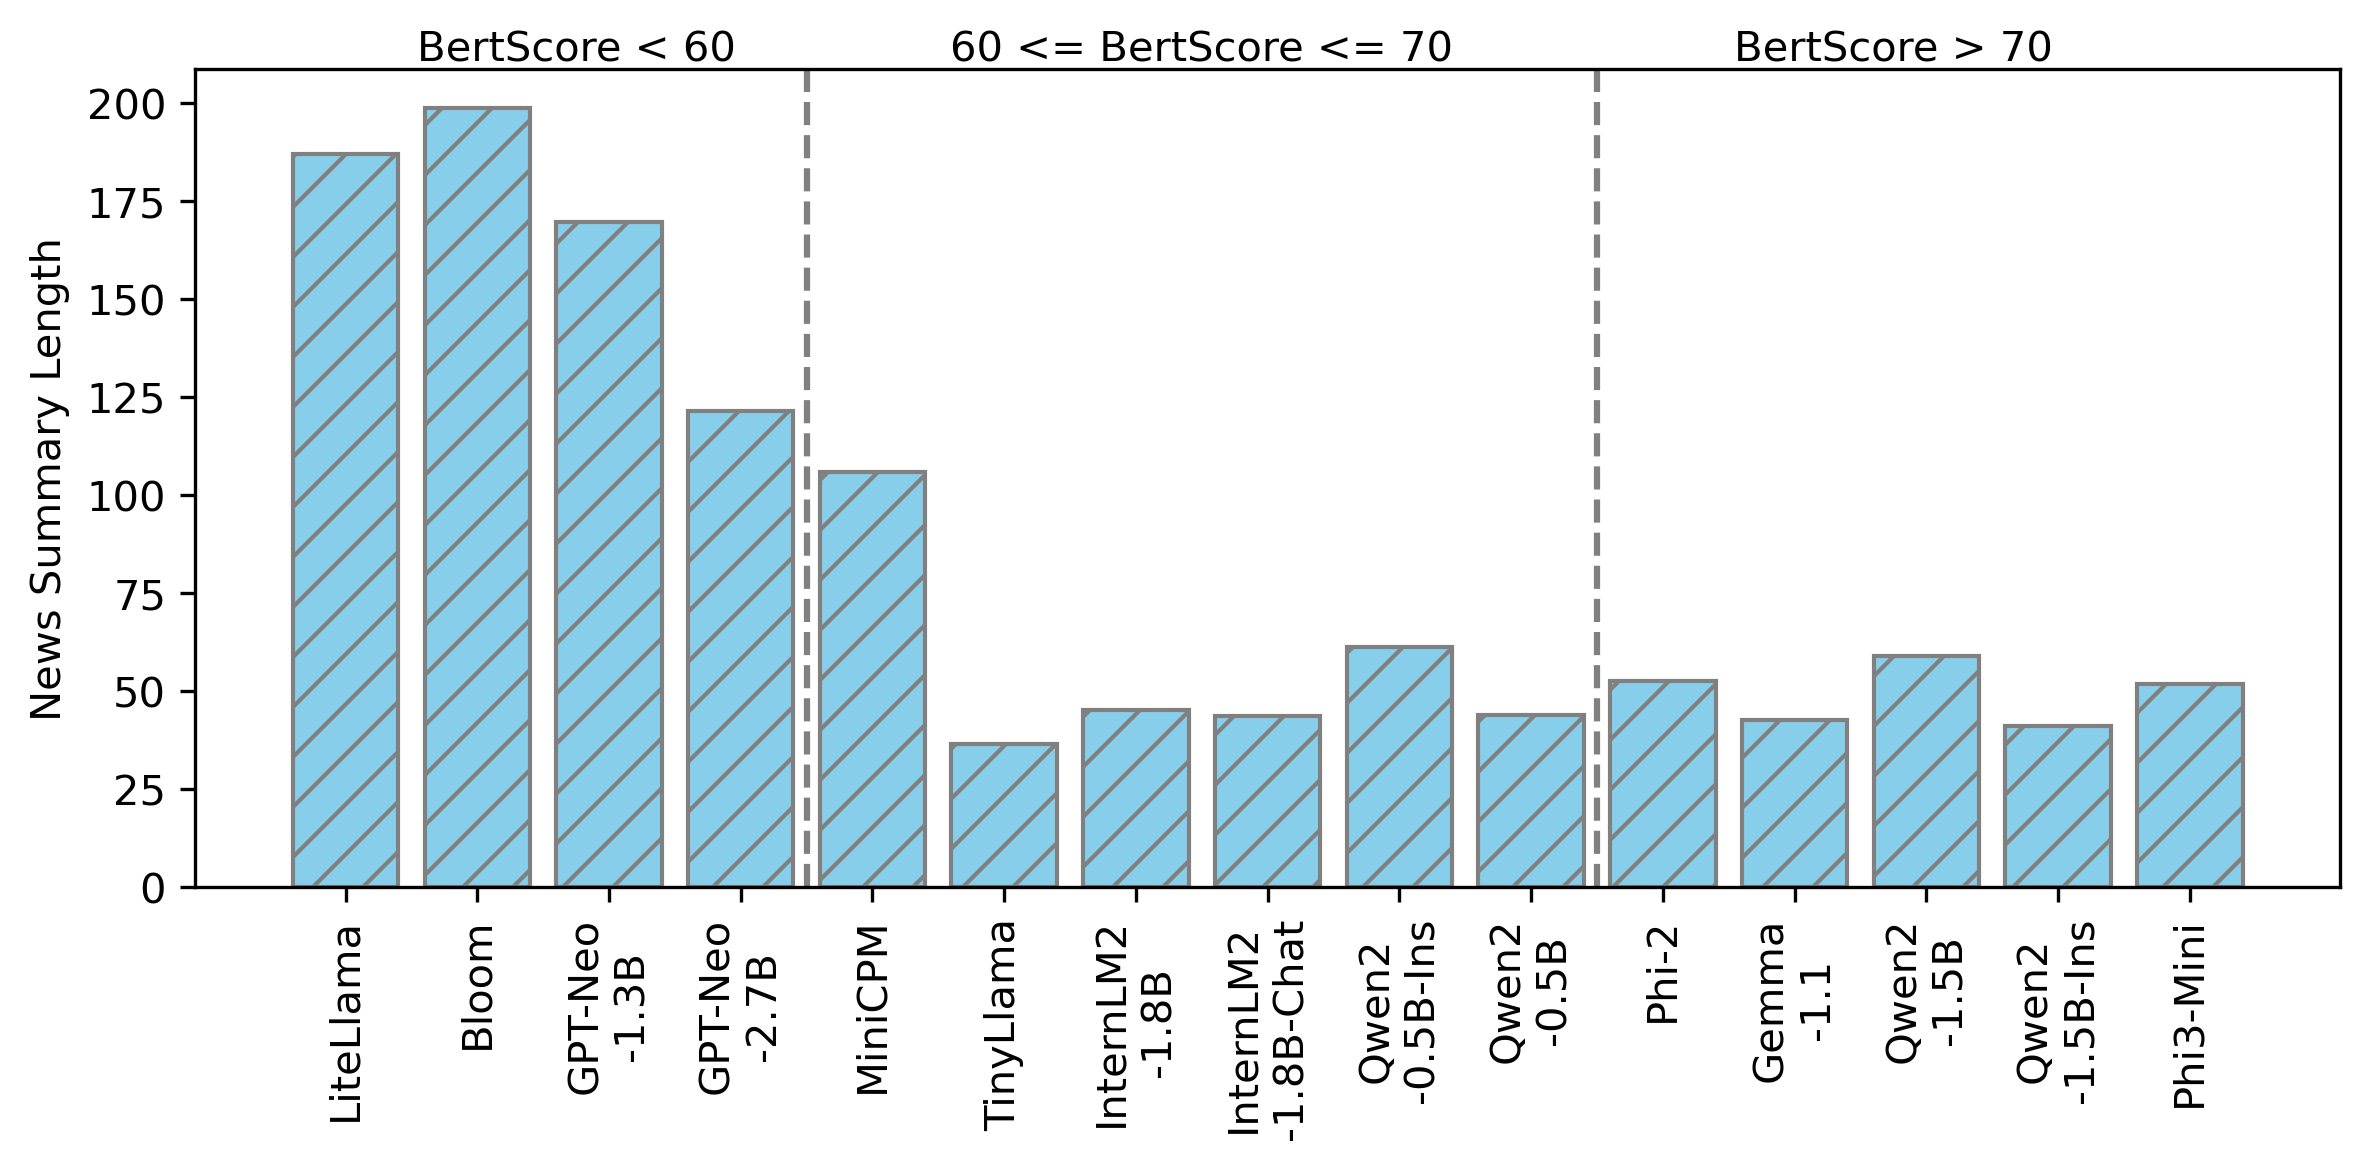

In [37]:
# histogram of length
# edgecolor='gray',hatch='//'
# histogram of length
# import numpy as np
# import matplotlib.pyplot as plt

# model_name = ['LiteLlama', 'Bloom', 'GPT-Neo\n-1.3B', 'GPT-Neo\n-2.7B', 'Qwen2\n-0.5B-Ins', 'MiniCPM', 'TinyLlama', 'InternLM2\n-1.8B', 'InternLM2\n-1.8B-Chat', 'Qwen2\n-0.5B', 'Phi-2', 'Qwen2\n-1.5B-Ins', 'Gemma-1.1', 'Qwen2-1.5B', 'Phi3-Mini']
# length = np.array([186.88, 198.6, 169.6, 121.55, 131.24, 105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 51.88])

# plt.figure(figsize=(8, 4), dpi=300)
# plt.bar(model_name, length, color='skyblue',edgecolor='gray',hatch='//')
# # plt.xlabel('SLM Name')
# plt.ylabel('News Summary Length')
# # plt.title('Model Length Comparison')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.savefig('hist_summary_length.pdf')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

model_name = ['LiteLlama', 'Bloom', 'GPT-Neo\n-1.3B', 'GPT-Neo\n-2.7B', 'MiniCPM', 'TinyLlama', 'InternLM2\n-1.8B', 'InternLM2\n-1.8B-Chat', 'Qwen2\n-0.5B-Ins','Qwen2\n-0.5B', 'Phi-2', 'Gemma\n-1.1', 'Qwen2\n-1.5B','Qwen2\n-1.5B-Ins', 'Phi3-Mini']
length = np.array([186.88, 198.6, 169.6, 121.55, 105.9, 36.6, 45.29, 43.58, 61.38 ,44.03, 52.72, 42.78, 59.10,41.20, 51.88])

plt.figure(figsize=(8, 4), dpi=300)
bars = plt.bar(model_name, length, color='skyblue', edgecolor='gray', hatch='//')

# 计算 GPT-Neo-2.7B 和 Qwen2-0.5B-Ins 之间的位置
gpt_neo_index = model_name.index('GPT-Neo\n-2.7B')
qwen_ins_index = model_name.index('MiniCPM')

phi2_index = model_name.index('Phi-2')
qwen2_0_5B_index = model_name.index('Qwen2\n-0.5B')

middle1_index = (gpt_neo_index + qwen_ins_index) / 2
middle2_index = (phi2_index + qwen2_0_5B_index) / 2

# 添加虚线
plt.axvline(x=middle1_index, color='gray', linestyle='--')
plt.axvline(x=middle2_index, color='gray', linestyle='--')

# 添加标签
plt.text((0 + middle1_index) / 2, max(length) + 10, 'BertScore < 60', ha='center', va='bottom', color='black')
plt.text((middle1_index + middle2_index) / 2, max(length) + 10, '60 <= BertScore <= 70', ha='center', va='bottom', color='black')
plt.text((middle2_index + len(model_name) - 1) / 2, max(length) + 10, 'BertScore > 70', ha='center', va='bottom', color='black')

plt.ylabel('News Summary Length')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('hist_summary_length.pdf')
plt.show()



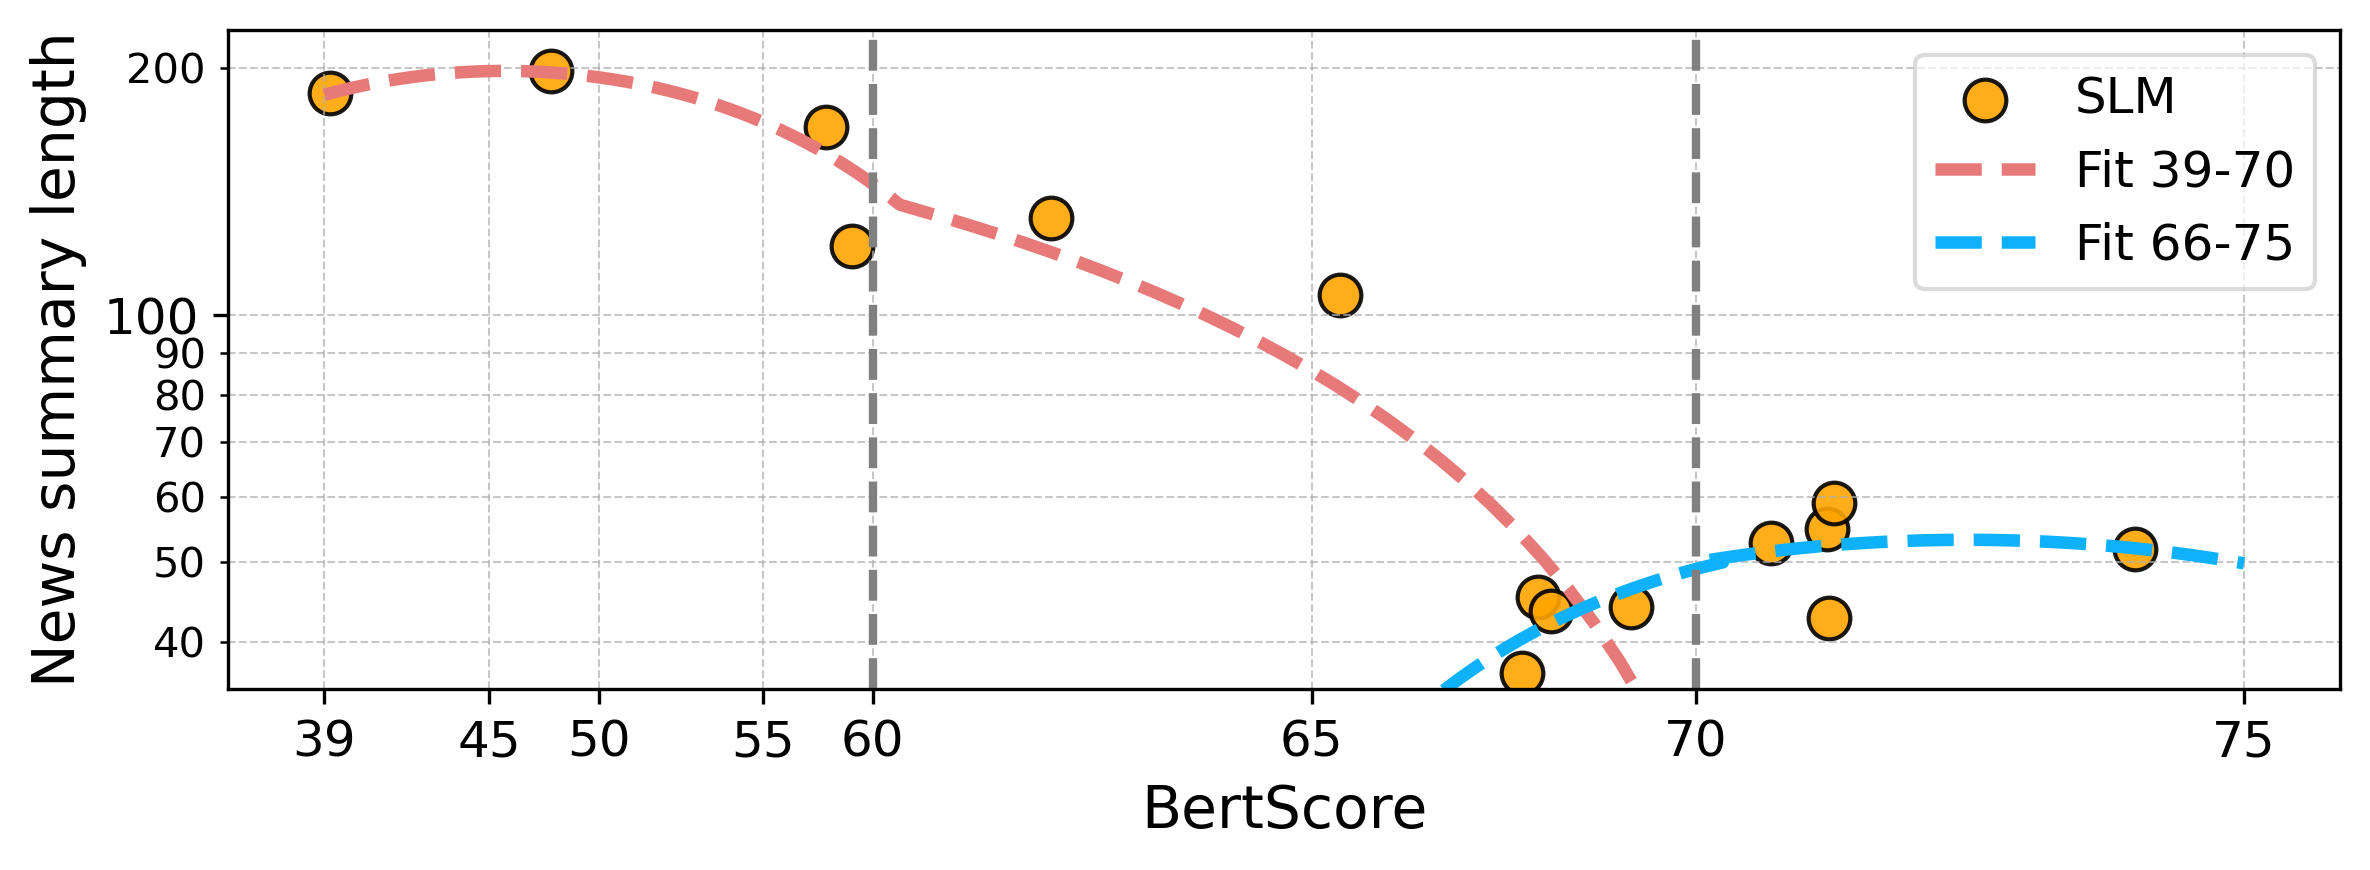

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

# Data
# x = np.array([39.19, 47.25, 57.30, 61.83, 65.35, 67.56, 67.75, 67.91, 68.88, 70.69, 71.20, 71.22, 71.26, 72.92, 73.77, 74.01, 74.38, 74.95])
# y = np.array([186.88, 198.6, 169.6, 131.24,105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 60.04, 55.79, 51.88, 59.40, 57.42])

x = np.array([39.19, 47.25, 57.30, 58.25, 61.83, 65.35, 67.56, 67.75, 67.91, 68.88, 70.69, 71.20, 71.22, 71.26, 74.01 ])
y = np.array([186.88, 198.6, 169.6, 121.55, 131.24 ,105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 51.88 ])

# Custom transform function for x-axis
def custom_transform(x):
    return np.piecewise(x,
                        [x < 60, (x >= 60) & (x <= 70), x > 70],
                        [lambda x: (x - 39) * 0.5,
                         lambda x: (x - 60) * 1.5 + 10.5,
                         lambda x: (x - 70) * 2.0 + 25])

# Apply custom transform
x_transformed = custom_transform(x)

# Define a function for polynomial fitting
def poly_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the data for the range 39 to 70
mask_39_70 = (x >= 39) & (x <= 70)
params_39_70, _ = curve_fit(poly_fit, x[mask_39_70], y[mask_39_70])

# Fit the data for the range 66 to 75
mask_66_75 = (x >= 66) & (x <= 75)
params_66_75, _ = curve_fit(poly_fit, x[mask_66_75], y[mask_66_75])

# Plotting
plt.figure(figsize=(8, 3),dpi=300)   # Adjust figure size as needed

# Scatter plot with improved colors and markers
plt.scatter(x_transformed, y, color='orange', edgecolor='k', s=100, alpha=0.9, label='SLM')

# Generate x values for plotting the fitted curves
x_fit_39_70 = np.linspace(39, 70, 100)
x_fit_66_75 = np.linspace(66, 75, 100)

# Plot the fitted curves
plt.plot(custom_transform(x_fit_39_70), poly_fit(x_fit_39_70, *params_39_70), color='#E77979', linestyle='--', linewidth=3,label='Fit 39-70')
plt.plot(custom_transform(x_fit_66_75), poly_fit(x_fit_66_75, *params_66_75), color='#0EB1FA', linestyle='--', linewidth=3,label='Fit 66-75')

# Customize plot appearance
plt.xlabel('BertScore', fontsize=14)
plt.ylabel('News summary length', fontsize=14)
# plt.title('Scatter Plot with Transformed X Axis and Polynomial Fitting', fontsize=16)

# Setting custom ticks
original_ticks = np.array([39, 45, 50, 55, 60, 65, 70, 75])
transformed_ticks = custom_transform(original_ticks)
plt.xticks(transformed_ticks, labels=original_ticks, fontsize=12)  # Use original tick labels
plt.yticks(fontsize=12)

# Set log scale for y-axis
plt.yscale('log')

# Use ScalarFormatter to show numbers in plain format
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.ScalarFormatter())

# Add grid for better readability
# plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add vertical dashed lines for x < 60 and x > 70 regions
plt.axvline(x=custom_transform(60), color='grey', linestyle='--', linewidth=2)
plt.axvline(x=custom_transform(70), color='grey', linestyle='--', linewidth=2)

# Annotate 60 and 70 on x-axis
# plt.text(custom_transform(60), plt.gca().get_ylim()[0], '60', ha='center', va='bottom', fontsize=12, color='grey')
# plt.text(custom_transform(70), plt.gca().get_ylim()[0], '70', ha='center', va='bottom', fontsize=12, color='grey')

# Add legend with improved styling
plt.legend(loc='best', fontsize=12, frameon=True, fancybox=True, framealpha=0.7)
plt.ylim(35,)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Display the plot
plt.tight_layout()
plt.savefig('summary_length.pdf')
plt.show()


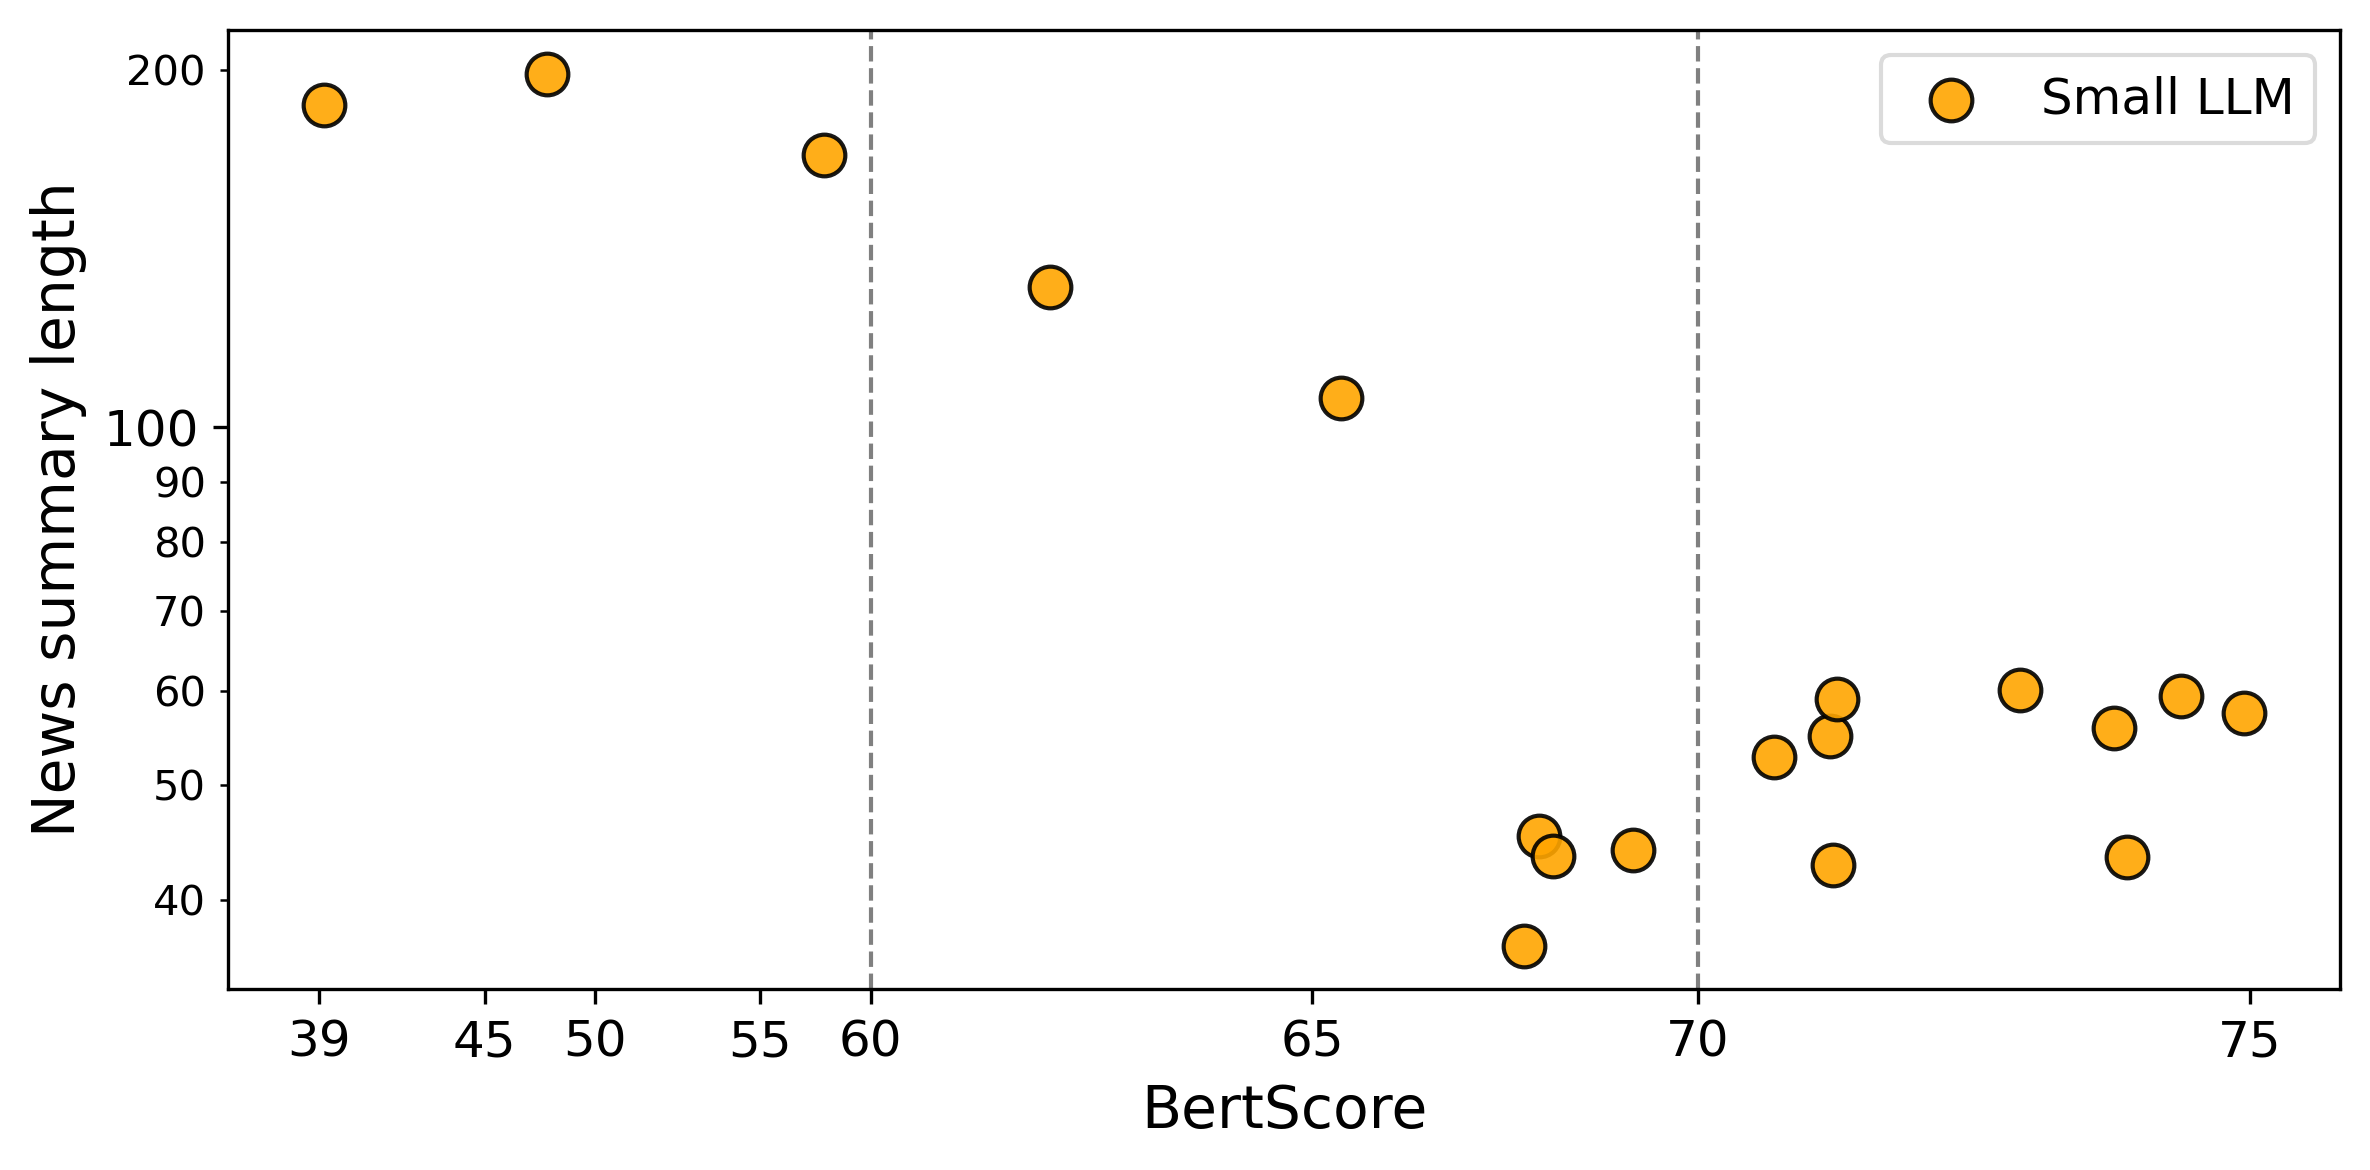

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
x = np.array([39.19, 47.25, 57.30, 61.83, 65.35, 67.56, 67.75, 67.91, 68.88, 70.69, 71.20, 71.22, 71.26, 72.92, 73.77, 73.89, 74.38, 74.95])
y = np.array([186.88, 198.6, 169.6, 131.24, 105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 60.04, 55.79, 43.48, 59.40, 57.42])

# Custom transform function for x-axis
def custom_transform(x):
    transformed_x = np.piecewise(x,
                                 [x < 60, (x >= 60) & (x <= 70), x > 70],
                                 [lambda x: (x - 39) * 0.5,
                                  lambda x: (x - 60) * 1.5 + 10.5,
                                  lambda x: (x - 70) * 2.0 + 25])
    return transformed_x

# Apply custom transform
x_transformed = custom_transform(x)

# Plotting
plt.figure(figsize=(8, 4),dpi=300)  # Adjust figure size as needed

# Scatter plot with improved colors and markers
plt.scatter(x_transformed, y, color='orange', edgecolor='k', s=100, alpha=0.9, label='Small LLM')

# Customize plot appearance
plt.xlabel('BertScore', fontsize=14)
plt.ylabel('News summary length', fontsize=14)
# plt.title('Scatter Plot with Transformed X Axis', fontsize=16)

# Setting custom ticks
original_ticks = np.array([39, 45, 50, 55, 60, 65, 70, 75])
transformed_ticks = custom_transform(original_ticks)
plt.xticks(transformed_ticks, labels=original_ticks, fontsize=12)  # Use original tick labels
plt.yticks(fontsize=12)

# Set log scale for y-axis
plt.yscale('log')

# Use ScalarFormatter to show numbers in plain format
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.ScalarFormatter())

# Add grid for better readability
# plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add vertical dashed lines for x < 60 and x > 70 regions
plt.axvline(x=custom_transform(60), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=custom_transform(70), color='grey', linestyle='--', linewidth=1)

# Annotate 60 and 70 on x-axis
# plt.text(custom_transform(60), plt.gca().get_ylim()[0], '60', ha='center', va='bottom', fontsize=12, color='grey')
# plt.text(custom_transform(70), plt.gca().get_ylim()[0], '70', ha='center', va='bottom', fontsize=12, color='grey')

# Add legend with improved styling
plt.legend(loc='best', fontsize=12, frameon=True, fancybox=True, framealpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig('summary_length.pdf')
plt.show()



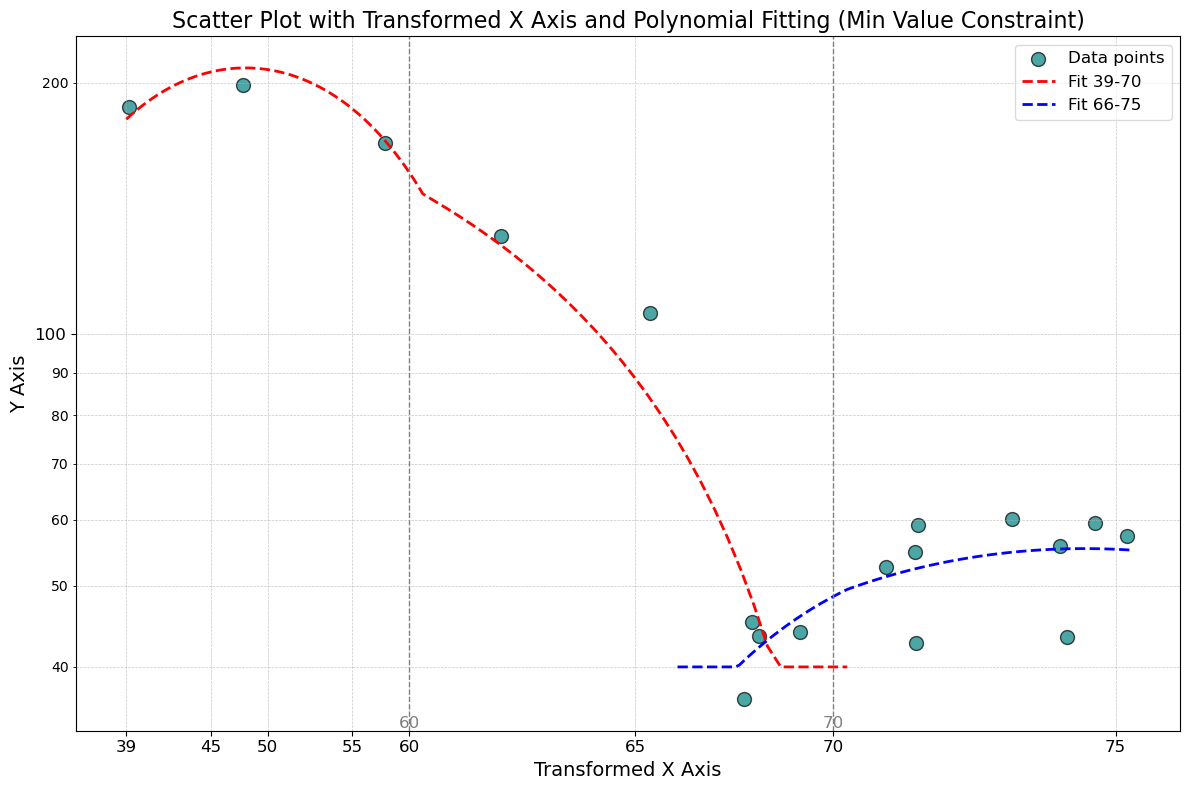

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

# Data
x = np.array([39.19, 47.25, 57.30, 61.83, 65.35, 67.56, 67.75, 67.91, 68.88, 70.69, 71.20, 71.22, 71.26, 72.92, 73.77, 73.89, 74.38, 74.95])
y = np.array([186.88, 198.6, 169.6, 131.24, 105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 60.04, 55.79, 43.48, 59.40, 57.42])

# Custom transform function for x-axis
def custom_transform(x):
    return np.piecewise(x,
                        [x < 60, (x >= 60) & (x <= 70), x > 70],
                        [lambda x: (x - 39) * 0.5,
                         lambda x: (x - 60) * 1.5 + 10.5,
                         lambda x: (x - 70) * 2.0 + 25.5])

# Apply custom transform
x_transformed = custom_transform(x)

# Define a function for polynomial fitting with lower bound constraint
def poly_fit_constrained(x, a, b, c):
    return np.maximum(a * x**2 + b * x + c, 40)  # Ensure the curve doesn't go below 40

# Fit the data for the range 39 to 70
mask_39_70 = (x >= 39) & (x <= 70)
params_39_70, _ = curve_fit(poly_fit_constrained, x[mask_39_70], y[mask_39_70])

# Fit the data for the range 66 to 75
mask_66_75 = (x >= 66) & (x <= 75)
params_66_75, _ = curve_fit(poly_fit_constrained, x[mask_66_75], y[mask_66_75])

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Scatter plot with improved colors and markers
plt.scatter(x_transformed, y, color='teal', edgecolor='k', s=100, alpha=0.7, label='Data points')

# Generate x values for plotting the fitted curves
x_fit_39_70 = np.linspace(39, 70, 100)
x_fit_66_75 = np.linspace(66, 75, 100)

# Plot the fitted curves
plt.plot(custom_transform(x_fit_39_70), poly_fit_constrained(x_fit_39_70, *params_39_70), 'r--', label='Fit 39-70', linewidth=2)
plt.plot(custom_transform(x_fit_66_75), poly_fit_constrained(x_fit_66_75, *params_66_75), 'b--', label='Fit 66-75', linewidth=2)

# Customize plot appearance
plt.xlabel('Transformed X Axis', fontsize=14)
plt.ylabel('Y Axis', fontsize=14)
plt.title('Scatter Plot with Transformed X Axis and Polynomial Fitting (Min Value Constraint)', fontsize=16)

# Setting custom ticks
original_ticks = np.array([39, 45, 50, 55, 60, 65, 70, 75])
transformed_ticks = custom_transform(original_ticks)
plt.xticks(transformed_ticks, labels=original_ticks, fontsize=12)  # Use original tick labels
plt.yticks(fontsize=12)

# Set log scale for y-axis
plt.yscale('log')

# Use ScalarFormatter to show numbers in plain format
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(ticker.ScalarFormatter())

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add vertical dashed lines for x < 60 and x > 70 regions
plt.axvline(x=custom_transform(60), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=custom_transform(70), color='grey', linestyle='--', linewidth=1)

# Annotate 60 and 70 on x-axis
plt.text(custom_transform(60), plt.gca().get_ylim()[0], '60', ha='center', va='bottom', fontsize=12, color='grey')
plt.text(custom_transform(70), plt.gca().get_ylim()[0], '70', ha='center', va='bottom', fontsize=12, color='grey')

# Add legend with improved styling
plt.legend(loc='best', fontsize=12, frameon=True, fancybox=True, framealpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


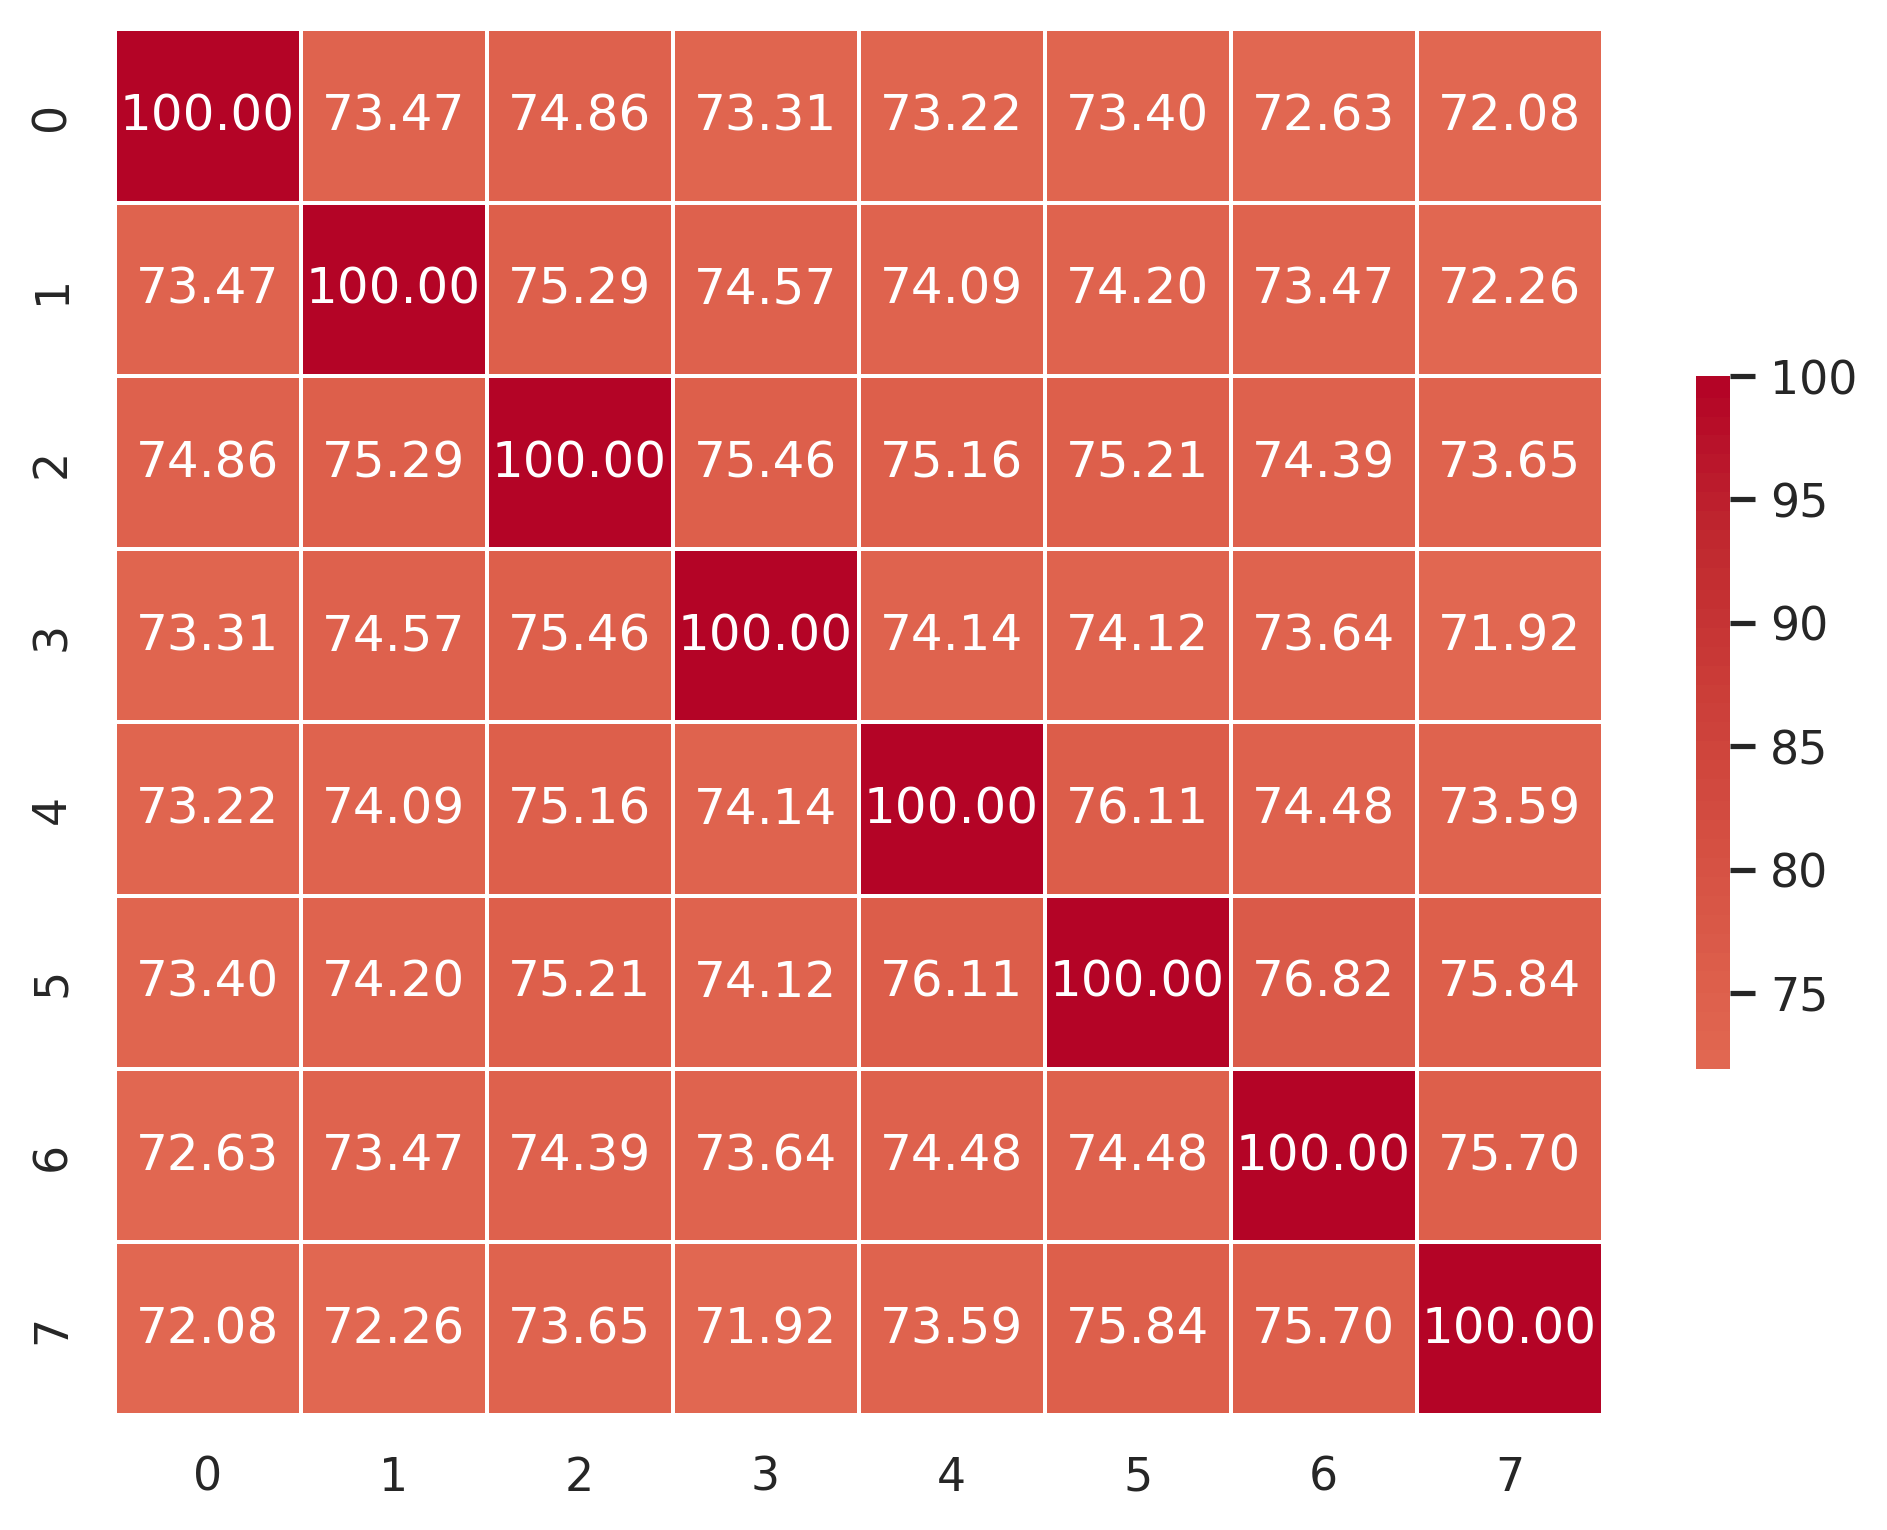

In [12]:
#relevance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 示例数据

# data = pd.DataFrame({
#     'Expert1':[3.26, 4.0, 3.91, 3.93, 3.84, 4.14, 4.15, 4.29, 3.45, 4.27, 4.03, 4.2, 4.26, 3.76, 3.64, 3.49],
#     'Expert2':[3.09, 3.87, 4.23, 3.62, 3.76, 3.94, 4.48, 4.71, 3.32, 4.78, 4.0, 4.47, 4.74, 3.56, 3.31, 3.82],
#     'Expert3':[3.09, 3.63, 3.31, 3.35, 3.42, 3.46, 3.54, 3.69, 3.12, 3.73, 3.4, 3.74, 3.75, 3.32, 3.18, 3.25],
#     'CS1':[4.03, 3.87, 4.13, 4.13, 3.98, 3.95, 4.02, 3.85, 3.9, 3.7, 3.84, 4.07, 3.73, 3.98, 3.98, 3.9],
#     'CS2':[4.03, 3.87, 4.14, 4.05, 3.96, 3.93, 3.94, 4.0, 3.77, 3.89, 3.89, 4.02, 3.89, 3.89, 3.95, 4.01],
#     'CS3':[3.91, 3.89, 4.16, 4.11, 3.96, 3.91, 4.1, 3.96, 3.86, 3.89, 3.96, 4.15, 3.69, 3.96, 4.02, 3.98],
#     'CS4':[3.89, 3.85, 4.05, 4.0, 3.91, 3.88, 3.98, 3.99, 3.84, 3.86, 3.9, 4.02, 4.07, 3.91, 3.98, 3.94],
#     'CS5':[3.88, 3.88, 3.92, 3.9675, 3.962, 3.96, 3.97, 3.975, 3.97, 3.966, 3.96, 3.97, 3.96, 3.97, 3.96, 3.9625]
    
# })

data = [[100, 73.47, 74.86, 73.31, 73.22, 73.40, 72.63, 72.08],
        [73.47, 100, 75.29, 74.57, 74.09, 74.20, 73.47, 72.26],
        [74.86, 75.29, 100, 75.46, 75.16, 75.21, 74.39, 73.65],
        [73.31, 74.57, 75.46, 100, 74.14, 74.12, 73.64, 71.92],
        [73.22, 74.09, 75.16, 74.14, 100, 76.11, 74.48, 73.59],
        [73.40, 74.20, 75.21, 74.12, 76.11, 100, 76.82, 75.84],
        [72.63, 73.47, 74.39, 73.64, 74.48, 74.48, 100, 75.70],
        [72.08, 72.26, 73.65, 71.92, 73.59, 75.84, 75.70, 100]]

# 转换为numpy数组
data = np.array(data)
# data = data/100
# 创建掩码
mask = np.eye(len(data), dtype=bool)


colors = [(1, 1, 1), (1, 0, 0), (0.5, 0, 0.5)]  # RGB颜色
n_bins = 100  # 用于颜色平滑
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 计算肯德尔系数矩阵
# kendall_corr = data.corr(method='kendall')

# print(kendall_corr.shape)
# # 绘制热图
sns.set(style='white')
plt.figure(figsize=(8, 6),dpi=300)
sns.heatmap(data ,annot=True,  fmt=".2f",cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5})
# sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='grey')
# plt.title('Kendall Correlation Heatmap of Different Annotators')
# plt.savefig('kendall_correlation_heatmap_relevance.pdf', format='pdf', bbox_inches='tight')
plt.show()



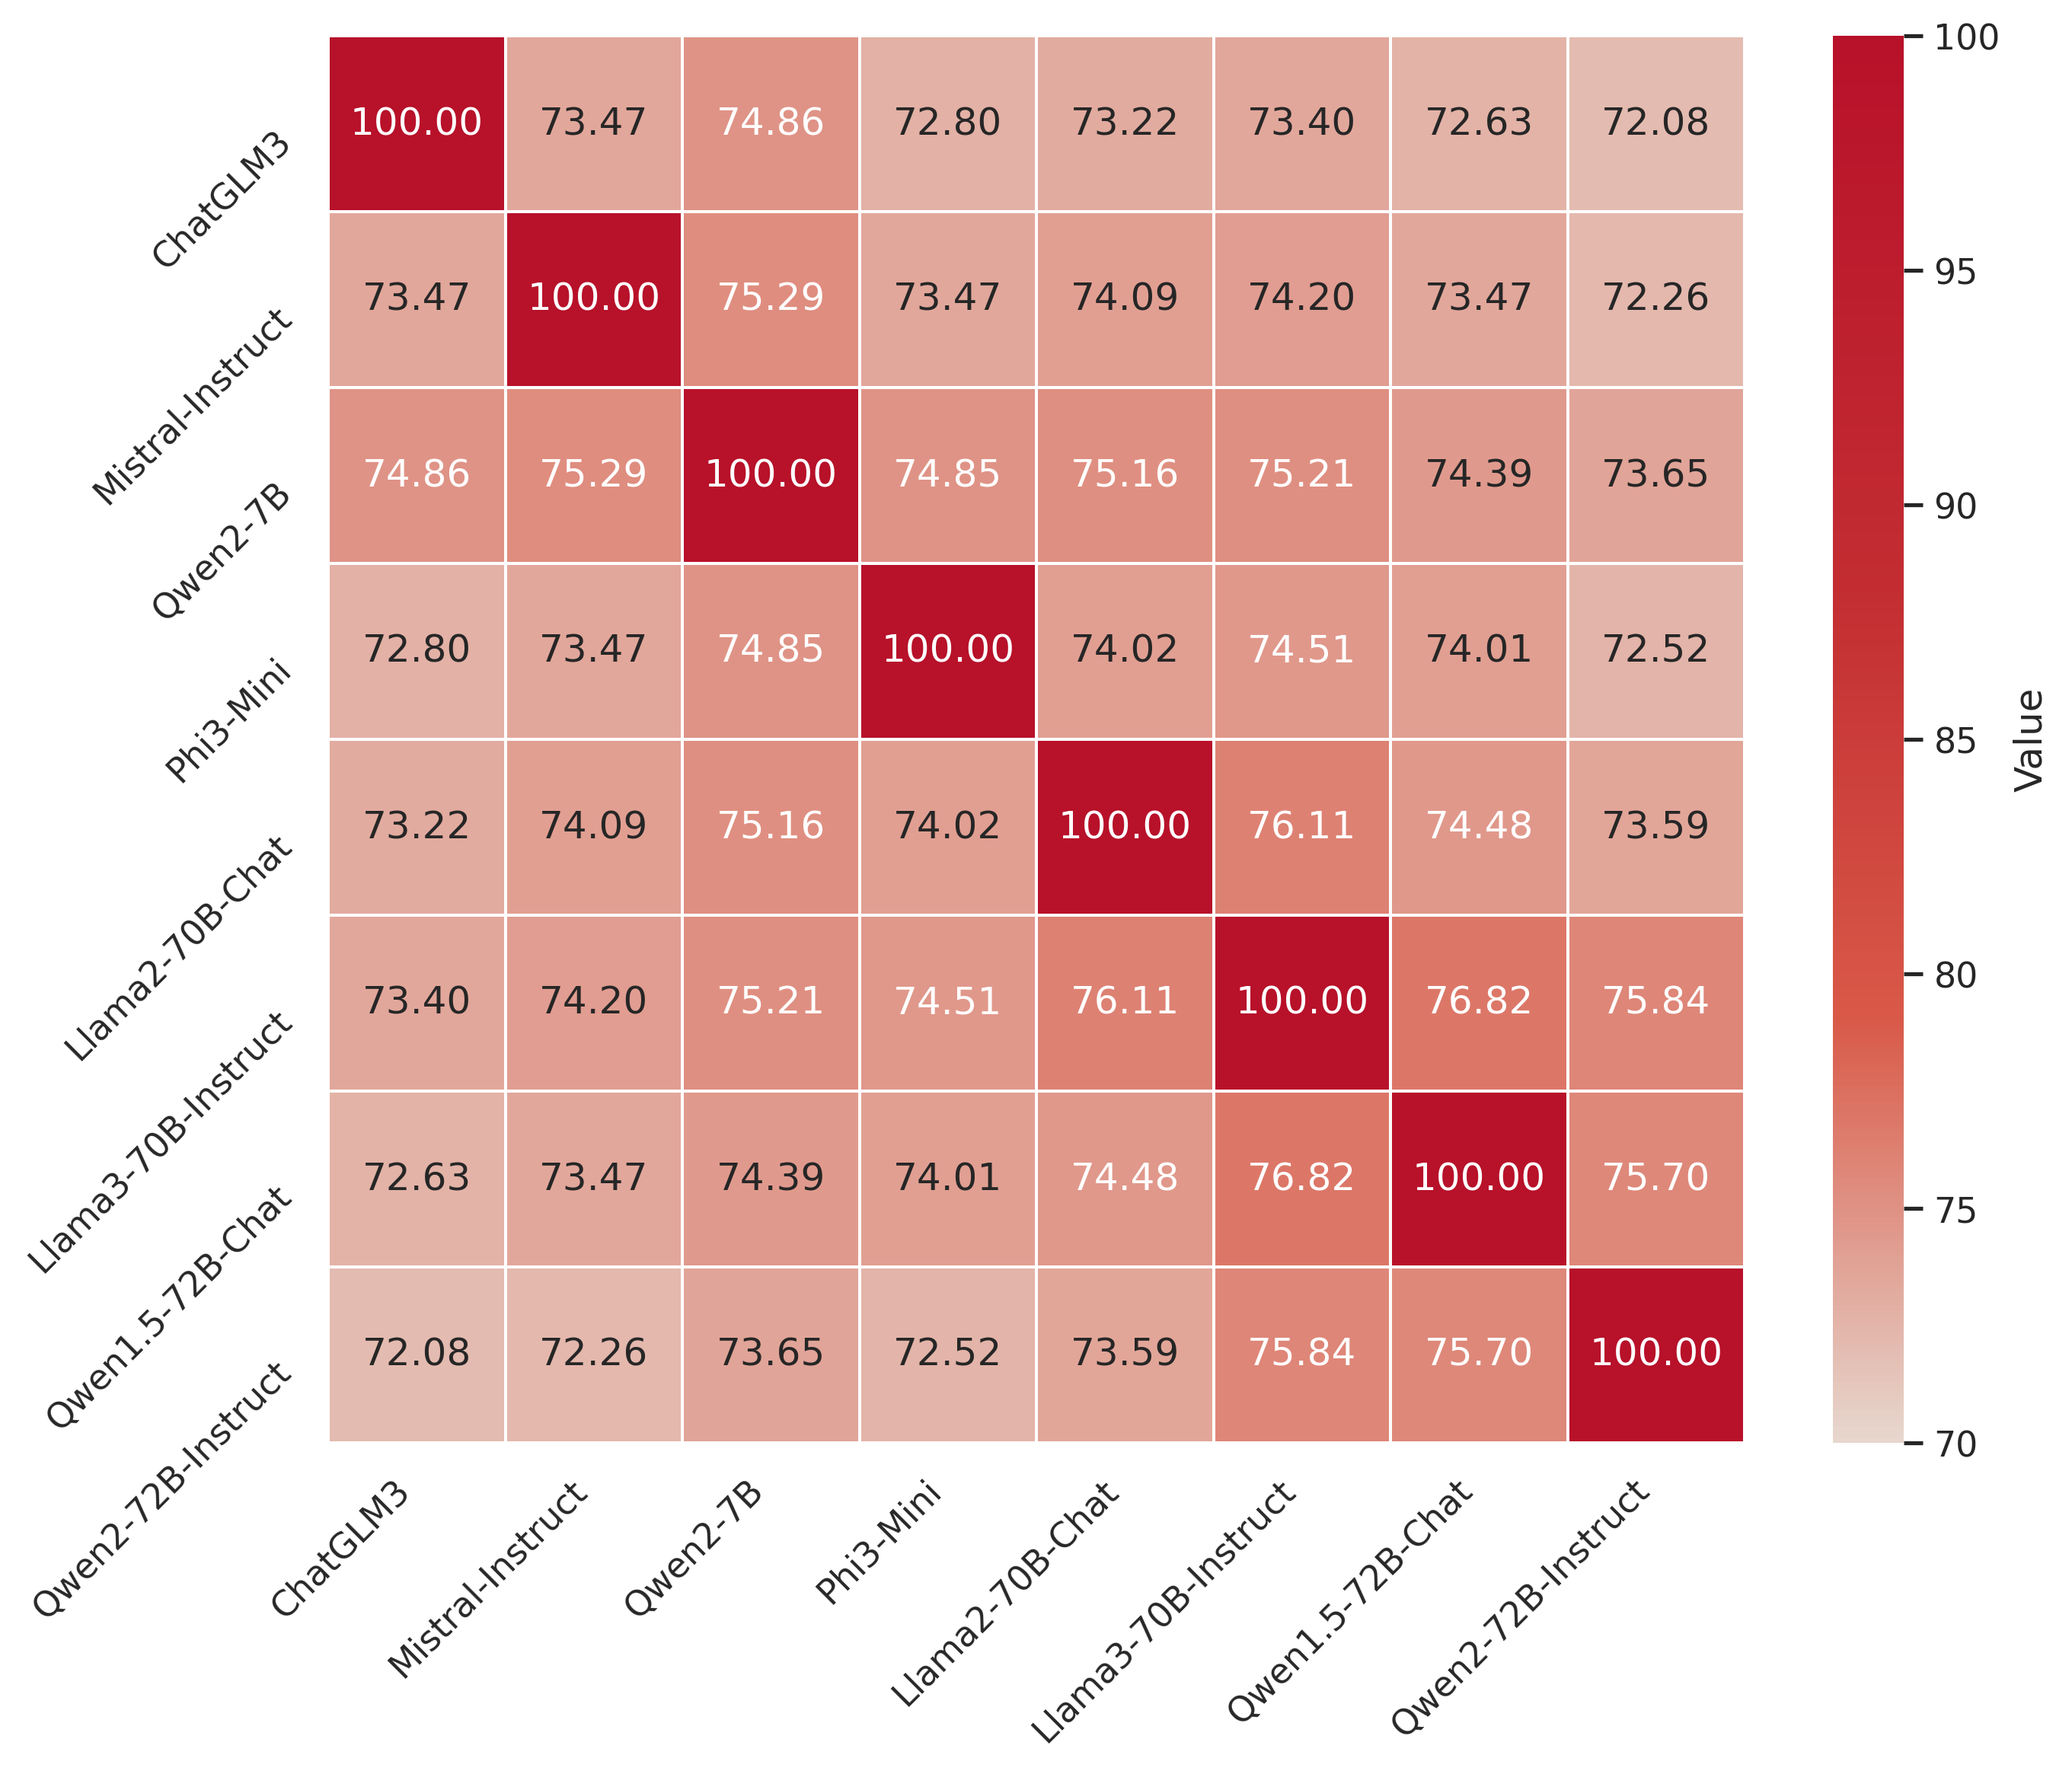

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 数据
data = [[100, 73.47, 74.86, 72.80, 73.22, 73.40, 72.63, 72.08],
        [73.47, 100, 75.29, 73.47, 74.09, 74.20, 73.47, 72.26],
        [74.86, 75.29, 100, 74.85, 75.16, 75.21, 74.39, 73.65],
        [72.80, 73.47, 74.85, 100, 74.02, 74.51, 74.01, 72.52],
        [73.22, 74.09, 75.16, 74.02, 100, 76.11, 74.48, 73.59],
        [73.40, 74.20, 75.21, 74.51, 76.11, 100, 76.82, 75.84],
        [72.63, 73.47, 74.39, 74.01, 74.48, 76.82, 100, 75.70],
        [72.08, 72.26, 73.65, 72.52, 73.59, 75.84, 75.70, 100]]

# 将数据转换为numpy数组
data = np.array(data)

# 创建自定义的颜色映射
colors = [(0, '#E7D7CE'), (0.3, '#D95948'), (0.6, '#C32E32'), (1, '#B8112A')]
cmap = LinearSegmentedColormap.from_list('custom_coolwarm', colors)

row_labels = ["ChatGLM3", "Mistral-Instruct", "Qwen2-7B", "Phi3-Mini", 
              "Llama2-70B-Chat", "Llama3-70B-Instruct", "Qwen1.5-72B-Chat","Qwen2-72B-Instruct"]

sns.set(style='white')
# 设置图形尺寸
plt.figure(figsize=(10, 8),dpi=300)

# 绘制热图，使用自定义的颜色映射
heatmap = sns.heatmap(data, annot=True, cmap=cmap, cbar_kws={'label': 'Value'}, fmt='.2f', vmin=70, vmax=100,linewidths=.5,annot_kws={'fontsize': 12},
            xticklabels=row_labels, yticklabels=row_labels,)


# 设置标题和标签
# plt.title('Heatmap of Data with Custom Color Range')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
heatmap.set_xticklabels(heatmap.get_xticklabels(), ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), ha='right',va='top')
# plt.subplots_adjust(left=0.15, right=0.9, top=0.95, bottom=0.15)
# 显示图形
plt.savefig('vsLLM_bertscore.pdf', format='pdf', bbox_inches='tight')
plt.show()


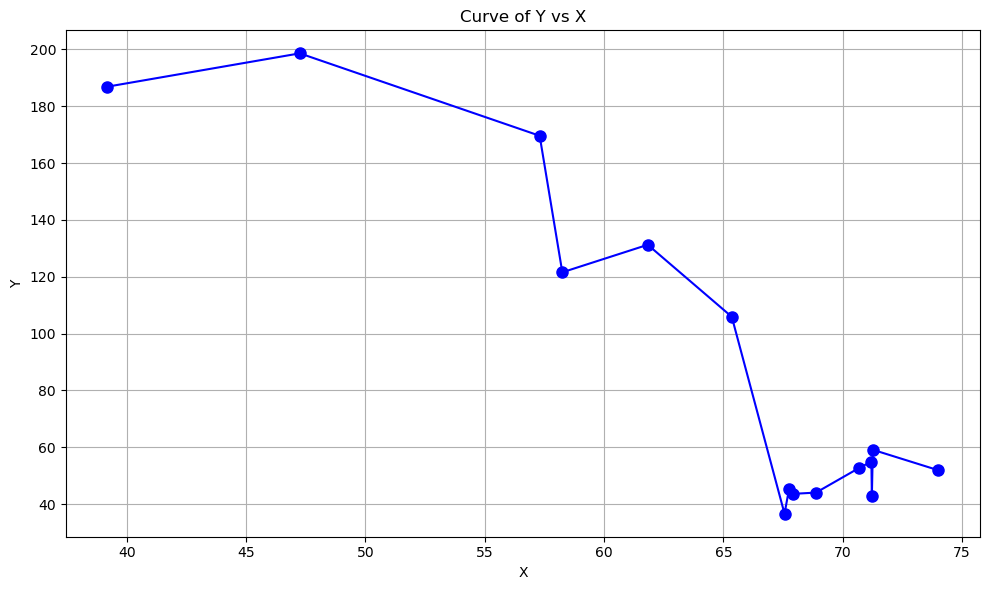

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([39.19, 47.25, 57.30, 58.25, 61.83, 65.35, 67.56, 67.75, 67.91, 68.88, 70.69, 71.20, 71.22, 71.26, 74.01])
y = np.array([186.88, 198.6, 169.6, 121.55, 131.24, 105.9, 36.6, 45.29, 43.58, 44.03, 52.72, 54.93, 42.78, 59.10, 51.88])

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve of Y vs X')
plt.grid(True)
plt.tight_layout()

plt.show()


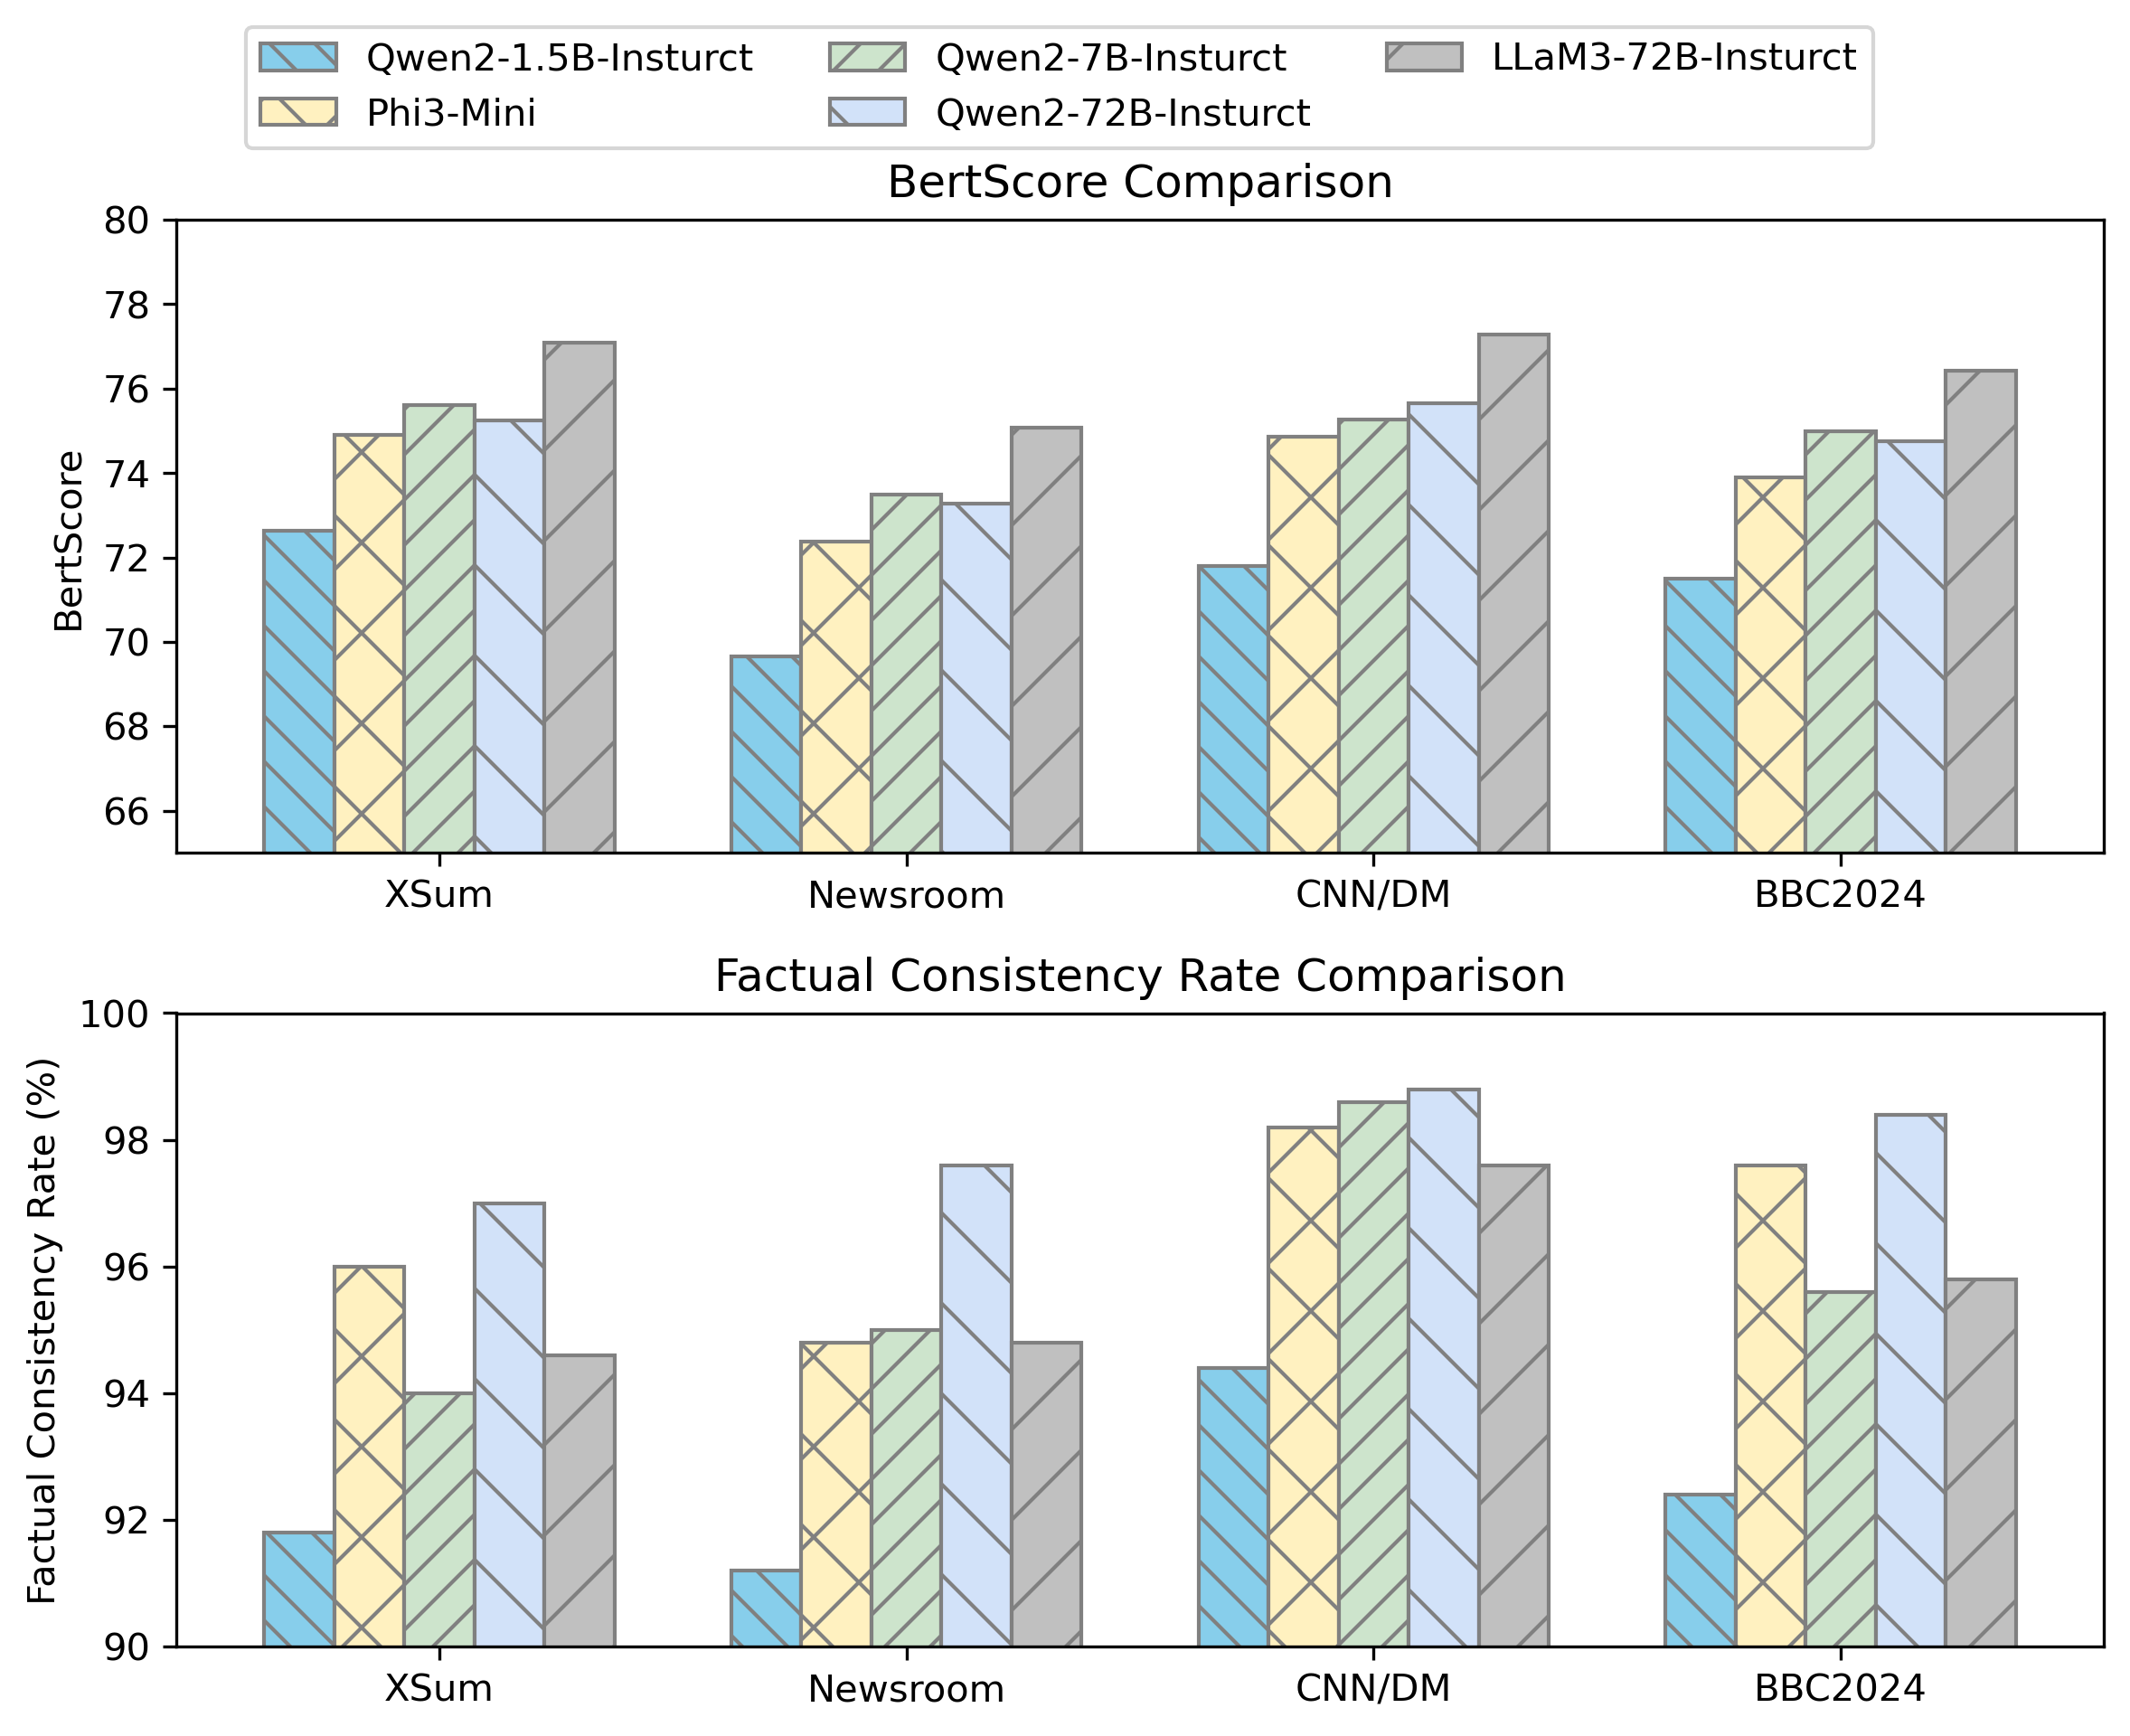

In [36]:
# import numpy as np

# #four dataset XSum, Newsroom, CNN/DM, BBC2024
# #BertScore
# qwen2_1_5B_ins_bertscore =[73.06,69.86,71.95,71.97]
# phi3_mini_bertscore = [75.14,72.32,74.88,73.72]
# qwen2_7B_ins_bertscore =  [74.88,72.81,74.59,74.43]
# qwen2_72B_bertscore = [74.14,72.14,74.61,73.78]
# llam3_72B_bertscore = [76.77,74.67,76.95,76.06]

# # Factual consistency rate (%) 
# qwen2_1_5B_ins_fact = [91.8, 91.2, 94.4, 92.4, 92.5]
# phi3_mini_fact = [95.6, 96.2, 97.4, 96.6, 96.5]
# qwen2_7B_ins_fact = [94.0, 95.0, 98.6, 95.6, 95.8]
# qwen2_72B_fact = [94.6, 94.8, 97.6, 95.8, 95.7]
# llam3_72B_fact = [97.0, 97.6, 98.8, 98.4, 98.0]


import numpy as np
import matplotlib.pyplot as plt

# 数据集
datasets = ['XSum', 'Newsroom', 'CNN/DM', 'BBC2024']

# BertScore
qwen2_1_5B_ins_bertscore = [72.64, 69.66,71.80,71.49]
phi3_mini_bertscore = [74.91,72.37,74.87,73.90]
qwen2_7B_ins_bertscore = [75.61, 73.48, 75.26, 74.99] 
qwen2_72B_bertscore = [75.25, 73.27, 75.65, 74.76] 
llam3_72B_bertscore = [77.08,75.07,77.29,76.42]

# Factual consistency rate (%)
qwen2_1_5B_ins_fact = [91.8, 91.2, 94.4, 92.4]
phi3_mini_fact = [96.0, 94.8, 98.2, 97.6]
qwen2_7B_ins_fact = [94.0, 95.0, 98.6, 95.6]
qwen2_72B_fact= [97.0, 97.6, 98.8, 98.4]
llam3_72B_fact= [94.6, 94.8, 97.6, 95.8]

# 颜色、条纹和边框颜色
colors = ['skyblue', '#FFF1C0', '#CDE4CC',  '#D2E2F9','#C0C0C0']
hatches = ['\\\\','x','//','\\','/']
edgecolors =['gray','gray','gray','gray','gray']

# 生成直方图
x = np.arange(len(datasets))
width = 0.15  # 每个柱子的宽度

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6),dpi=300)

# BertScore直方图
bars1 = [
    ax1.bar(x - 2*width, qwen2_1_5B_ins_bertscore, width, label='Qwen2-1.5B-Insturct', color=colors[0], edgecolor=edgecolors[0], hatch=hatches[0]),
    ax1.bar(x - width, phi3_mini_bertscore, width, label='Phi3-Mini', color=colors[1], edgecolor=edgecolors[1], hatch=hatches[1]),
    ax1.bar(x, qwen2_7B_ins_bertscore, width, label='Qwen2-7B-Insturct', color=colors[2], edgecolor=edgecolors[2], hatch=hatches[2]),
    ax1.bar(x + width, qwen2_72B_bertscore, width, label='Qwen2-72B-Insturct', color=colors[3], edgecolor=edgecolors[3], hatch=hatches[3]),
    ax1.bar(x + 2*width, llam3_72B_bertscore, width, label='LLaM3-72B-Insturct', color=colors[4], edgecolor=edgecolors[4], hatch=hatches[4])
]

# ax1.set_xlabel('Datasets')
ax1.set_ylabel('BertScore')
ax1.set_title('BertScore Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
# ax1.legend(ncol=3,fontsize=8)
ax1.set_ylim(65, 80)  # 设置y轴的范围

# Factual consistency rate直方图
bars2 = [
    ax2.bar(x - 2*width, qwen2_1_5B_ins_fact, width, label='Qwen2-1.5B-Insturct', color=colors[0], edgecolor=edgecolors[0], hatch=hatches[0]),
    ax2.bar(x - width, phi3_mini_fact, width, label='Phi3-Mini', color=colors[1], edgecolor=edgecolors[1], hatch=hatches[1]),
    ax2.bar(x, qwen2_7B_ins_fact, width, label='Qwen2-7B-Insturct', color=colors[2], edgecolor=edgecolors[2], hatch=hatches[2]),
    ax2.bar(x + width, qwen2_72B_fact, width, label='Qwen2-72B-Insturct', color=colors[3], edgecolor=edgecolors[3], hatch=hatches[3]),
    ax2.bar(x + 2*width, llam3_72B_fact, width, label='LLaM3-72B-Insturct', color=colors[4], edgecolor=edgecolors[4], hatch=hatches[4])
]

# ax2.set_xlabel('Datasets')
ax2.set_ylabel('Factual Consistency Rate (%)')
ax2.set_title('Factual Consistency Rate Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
# ax2.legend(ncol=2,fontsize=8)
ax2.set_ylim(90, 100)  # 设置y轴的范围

fig.legend(
    [bars1[0], bars1[1], bars1[2], bars1[3], bars1[4]],
    ['Qwen2-1.5B-Insturct', 'Phi3-Mini', 'Qwen2-7B-Insturct', 'Qwen2-72B-Insturct', 'LLaM3-72B-Insturct'],
    loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07), fancybox=True, 
)


plt.tight_layout()
plt.savefig('intor_fig.pdf', format='pdf', bbox_inches='tight')
plt.show()


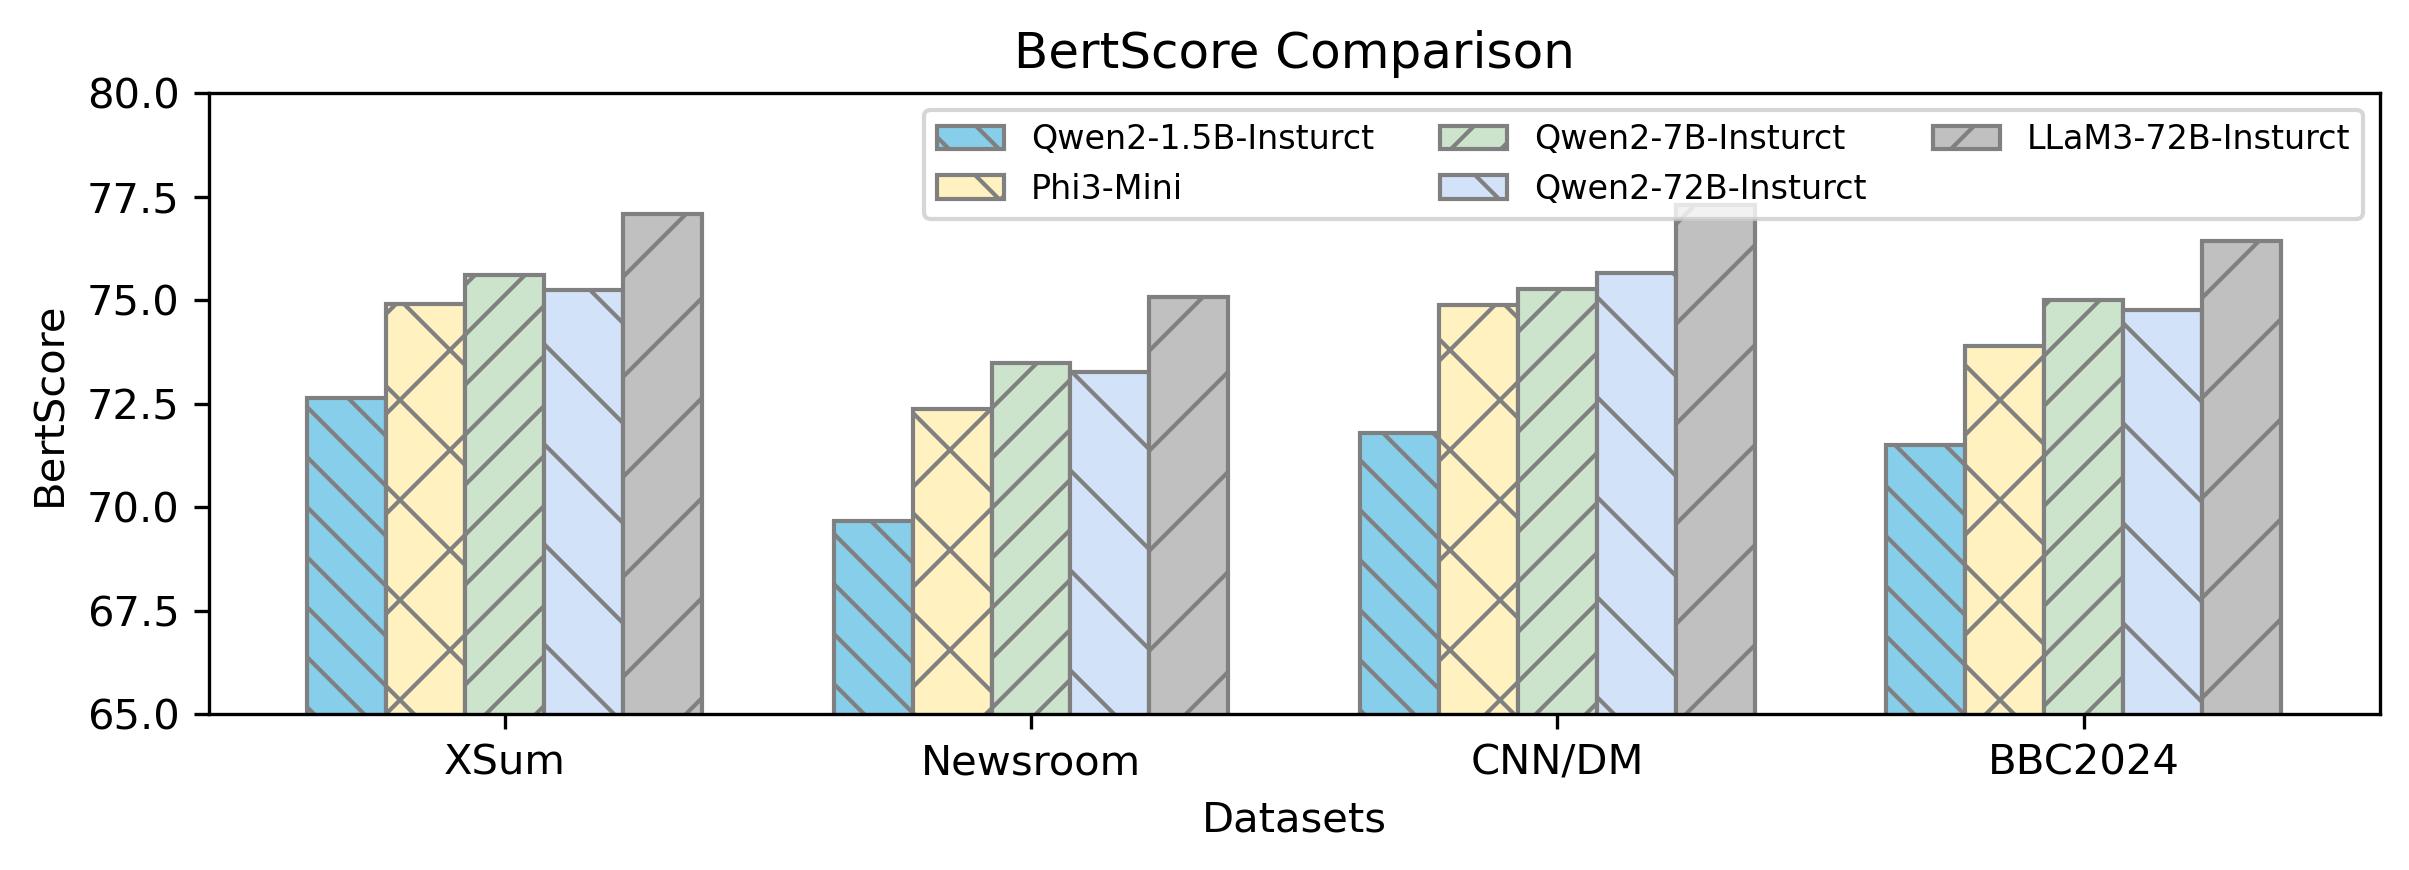

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 数据集
datasets = ['XSum', 'Newsroom', 'CNN/DM', 'BBC2024']


# qwen2_72b vs qwen1.5_72B   76.36 74.39 76.68 75.74
# BertScore
qwen2_1_5B_ins_bertscore = [72.64, 69.66,71.80,71.49]
phi3_mini_bertscore = [74.91,72.37,74.87,73.90]
qwen2_7B_ins_bertscore = [75.61, 73.48, 75.26, 74.99] 
qwen2_72B_bertscore = [75.25, 73.27, 75.65, 74.76] 
llam3_72B_bertscore = [77.08,75.07,77.29,76.42]

# Factual consistency rate (%)
qwen2_1_5B_ins_fact = [91.8, 91.2, 94.4, 92.4]
phi3_mini_fact = [96.0, 94.8, 98.2, 97.6]
qwen2_7B_ins_fact = [94.0, 95.0, 98.6, 95.6]
qwen2_72B_fact = [97.0, 97.6, 98.8, 98.4]
llam3_72B_fact = [94.6, 94.8, 97.6, 95.8]

# 颜色、条纹和边框颜色
colors = ['skyblue', '#FFF1C0', '#CDE4CC', '#D2E2F9', '#C0C0C0']
hatches = ['\\\\', 'x', '//', '\\', '/']
edgecolors = ['gray', 'gray', 'gray', 'gray', 'gray']

# 生成直方图
x = np.arange(len(datasets))
width = 0.15  # 每个柱子的宽度

fig, ax1 = plt.subplots(figsize=(8, 3), dpi=300)

# BertScore直方图
bars1 = [
    ax1.bar(x - 2*width, qwen2_1_5B_ins_bertscore, width, label='Qwen2-1.5B-Insturct', color=colors[0], edgecolor=edgecolors[0], hatch=hatches[0]),
    ax1.bar(x - width, phi3_mini_bertscore, width, label='Phi3-Mini', color=colors[1], edgecolor=edgecolors[1], hatch=hatches[1]),
    ax1.bar(x, qwen2_7B_ins_bertscore, width, label='Qwen2-7B-Insturct', color=colors[2], edgecolor=edgecolors[2], hatch=hatches[2]),
    ax1.bar(x + width, qwen2_72B_bertscore, width, label='Qwen2-72B-Insturct', color=colors[3], edgecolor=edgecolors[3], hatch=hatches[3]),
    ax1.bar(x + 2*width, llam3_72B_bertscore, width, label='LLaM3-72B-Insturct', color=colors[4], edgecolor=edgecolors[4], hatch=hatches[4])
]

ax1.set_xlabel('Datasets')
ax1.set_ylabel('BertScore')
ax1.set_title('BertScore Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend(ncol=3, fontsize=8)
ax1.set_ylim(65, 80)  # 设置y轴的范围

plt.tight_layout()
plt.savefig('intor_fig.pdf', format='pdf', bbox_inches='tight')
plt.show()
